In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
Housing=pd.read_csv('USA_Housing.csv')
Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<AxesSubplot:>

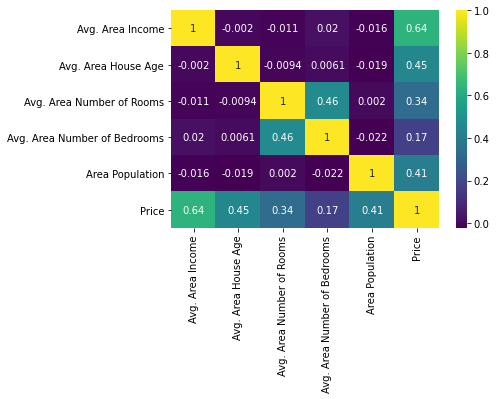

In [13]:
sns.heatmap(Housing.corr(),cmap='viridis',annot=True)

In [29]:
X=Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=Housing['Price']

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
algo=LinearRegression()
algo.fit(X_train,y_train)

LinearRegression()

In [33]:
print(algo.intercept_)

-2641372.667301229


In [38]:
coeff_df=pd.DataFrame(algo.coef_,X.columns,columns=['Coeffcient'])
coeff_df

,Coeffcient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


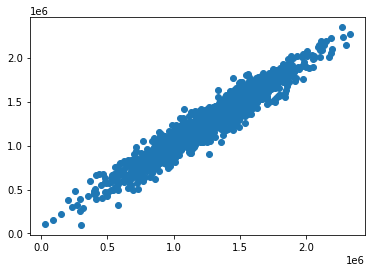

In [39]:
predictions=algo.predict(X_test)
plt.scatter(y_test,predictions)

In [40]:
Residuals=y_test - predictions

C:\Users\CVU5R0CA3\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

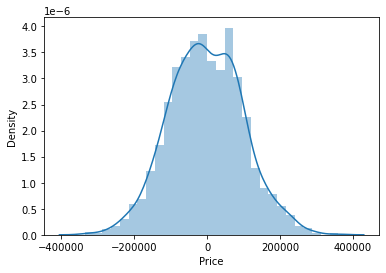

In [42]:
sns.distplot(Residuals)

In [43]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

81257.5579585586

In [53]:
metrics.mean_squared_error(y_test,predictions)

10169125565.897495

In [55]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

100842.08231634993